<center>
<div style="max-width:400px;">

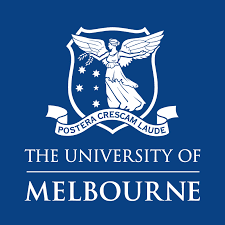

</div>
</center>

# Statistical Process Control Notebook

**Prof. Kevin Otto and Nikolas Crossan**  
The University of Melbourne  
Department of Mechanical Engineering

----------------------------------------------------------------------------

This notebook demonstrates computing statistical process control charts.  

This notebook relies on the `mqrpy` code library, found at https://pypi.org/project/mqrpy/

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

import mqr
from mqr.plot import Figure

from importlib.metadata import version
print('MQR version', version('mqrpy'))
print('Numpy version ', version('numpy'))
print('Scipy version ', version('scipy'))
print('Pandas version ', version('pandas'))

---------------------------------------------------------------------------------------------------------------------
## 1. Xbar R-Charts

Read in time series samples of measurements.  

In [ ]:
df = pd.read_csv(mqr.sample_data('spc.csv'))
n_samples, sample_size = df.shape
print('Number of SPC samples:', n_samples)
print('Sample size:', sample_size)
df.head()

Define the mean and range averages to be used.  If unknown, use the data means.  If known, enter as constants.  

Typically they are known, and now you are checking for a shift in production with a new sample you want to add to the SPC chart.  

Atypically, you do not know as this is a new production startup and so data is collected to initialize.  This should be for a large number of samples.  

If the historical range $\bar{R}$ for a sample size is not know but the standard deviation $s$ is, the historical range for a sample size of $n$ is
$$
    \bar{R} = s * d2[n]
$$


Compute upper and lower control limits.

In [ ]:
mean_hist = 10.0
std_hist = 0.002
range_hist = 0.002 * mqr.spc.util.d2(sample_size)

x_params = mqr.spc.XBarParams.from_range(mean_hist, range_hist, sample_size)
r_params = mqr.spc.RParams.from_range(range_hist, sample_size)

# If using stddev:
# x_params = mqr.spc.XBarParams(mean_hist, std_hist)
# s_params = mqr.spc.SParams(std_hist)

# If the historical mean and sigma are unknown, create the params from data
# x_params = mqr.spc.XBarParams.from_data(df)
# s_params = mqr.spc.SParams.from_data(df)

Now create the graphs.

In [ ]:
with Figure(6, 5, 2, 1) as (fig, axs):
    mqr.plot.spc.chart(x_params.statistic(df), x_params, ax=axs[0])
    mqr.plot.spc.chart(r_params.statistic(df), r_params, ax=axs[1])

Now suppose another datapoint is added, the sample:

10.0019	10.0027	10.0038	10.0036	9.9973	10.0037	10.0028	10.0017

Append this as a row and recalculate the charts. Note that the historical values have not changed.

In [ ]:
df.loc[len(df)] = [10.0019, 10.0027, 10.0038, 10.0036, 9.9973, 10.0037, 10.0028, 10.0017]

Now redo.

In [ ]:
sample_size, n_samples = df.shape
print('Number of SPC samples:', n_samples)
print('Sample size:', sample_size)

In [ ]:
with Figure(6, 5, 2, 1) as (fig, axs):
    mqr.plot.spc.chart(x_params.statistic(df), x_params, ax=axs[0])
    mqr.plot.spc.chart(r_params.statistic(df), r_params, ax=axs[1])

Here we see the $\bar{x}$ chart has gone out of control for one data point.

---------------------------------------------------------------------------------------------------

## 2. Adding alarms to the plots

Use the `mqr.plot.spc.alarms` to add alarms to the chart when out of control.  Alarm points are marked two ways:
- a marker (a red dot by default) drawn over the statistic point, and
- a region of colour (red by default) showing the span of alarmed points.


In [ ]:
with Figure(6, 5, 2, 1) as (fig, axs):
    mqr.plot.spc.chart(x_params.statistic(df), x_params, ax=axs[0])
    mqr.plot.spc.chart(r_params.statistic(df), r_params, ax=axs[1])

    # Alarms - note the range data does not trigger an alarm
    mqr.plot.spc.alarms(x_params.statistic(df), x_params, mqr.spc.rules.limits(), ax=axs[0])
    mqr.plot.spc.alarms(r_params.statistic(df), r_params, mqr.spc.rules.limits(), ax=axs[1])